#  Set up & load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Data set of Fortune 500 companies spanning over 50 years since the list’s first publication in 1955, put together from Fortune’s public archive
df = pd.read_csv('https://s3.amazonaws.com/dq-blog-files/fortune500.csv')



# Data manipulation

## View data

In [2]:
df.info() # df.dtypes() # df.describe # df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 5 columns):
Year                     25500 non-null int64
Rank                     25500 non-null int64
Company                  25500 non-null object
Revenue (in millions)    25500 non-null float64
Profit (in millions)     25500 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 996.2+ KB


## Rename columns 

In [3]:
# rename columns
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

# rename revenue column to 'revenue_usd' 



## Set indices 

In [4]:
df_idx = df.set_index(['year', 'rank'])
# view data
df_idx.head()

company  revenue profit
year rank                                  
1955 1       General Motors   9823.5    806
     2          Exxon Mobil   5661.4  584.8
     3           U.S. Steel   3250.4  195.4
     4     General Electric   2959.1  212.6
     5               Esmark   2510.8   19.1

# Missing values

In [5]:
# a check to see if there are missing values in dataframe
print(df.isnull().sum())

# to remove na's 
#df = df.dropna()

year       0
rank       0
company    0
revenue    0
profit     0
dtype: int64


## Change data types 

In [6]:
# fix data type for profit - should be numeric

# remove the rows with missing values  
non_numeric = df.profit.str.contains('[^0-9.-]')
df = df.loc[~non_numeric]

# Convert the profit column to numeric
df.profit = df.profit.apply(pd.to_numeric)

## Change variables

In [8]:
# rename a company using replace function
## change the name of American Financial Grp. to American Financial Group using the dictionary
df['company'] = df['company'].replace({'General Electric' : 'GE'})

## Adding columns 

In [9]:
# add column 
df['year_rank'] = df['year'].astype(str) + '-' + df['rank'].astype(str)
df.year_rank.head()

# add new column for average monthly profit



0    1955-1
1    1955-2
2    1955-3
3    1955-4
4    1955-5
Name: year_rank, dtype: object

# Filtering a dataframe

In [10]:

# find Texaco records for year 1980
df[(df.year == 1980) & (df.company == "Texaco")]

# find all companies with profit over $10bn since 1995



,year,rank,company,revenue,profit,year_rank
12504,1980,5,Texaco,38350.4,1759.1,1980-5


## Summarising data 

### Rearrange to view profits for each year

In [12]:
wide_comp = df.pivot_table(index = 'year', columns = 'rank', aggfunc = 'sum', values='profit')
wide_comp.head()

rank,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
year,,,,,,,,,,,,,,,,,,,,,
1955,806.0,584.8,195.4,212.6,19.1,18.5,1.6,182.8,183.8,344.4,...,2.5,0.9,1.7,4.3,3.4,9.3,4.8,0.7,-2.7,0.9
1956,1189.5,709.3,437.0,370.1,100.1,200.9,22.9,180.2,10.1,431.6,...,1.3,6.1,9.6,7.0,5.0,3.8,2.2,2.2,2.3,2.9
1957,847.4,808.5,236.6,348.1,213.8,249.5,20.0,14.0,81.0,282.7,...,0.6,1.7,4.6,5.8,1.4,1.4,7.2,4.8,6.0,5.7
1958,843.6,805.2,282.8,419.4,247.9,120.0,220.4,354.3,191.0,13.5,...,-3.3,2.4,1.4,2.4,3.1,1.3,0.6,1.9,3.1,1.3
1959,633.6,562.5,95.7,242.9,301.6,156.8,329.5,10.0,310.2,85.9,...,3.7,NaN,2.7,2.8,4.0,2.5,3.0,2.2,-5.0,1.7


### Aggregating data 

In [13]:
# How many times does each company appear?

comp = df.groupby('company')['year'].count()
comp = comp.sort_values(ascending = False)
comp.head()

company
CBS                       57
OfficeMax                 55
Merck                     51
Marathon Oil              51
Goodyear Tire & Rubber    51
Name: year, dtype: int64

In [ ]:
## sum the total revenue for each company


In [15]:
# find the average profit made per year of all companies 


## Graphs 

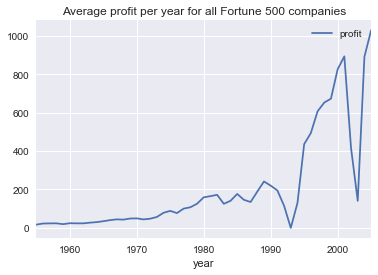

In [16]:
# display results from average profit made per year of all companies in graph
fig, ax = plt.subplots()
avg_profit.plot(ax=ax, label='profit')
plt.legend(loc='upper right')
ax.set_title('Average profit per year for all Fortune 500 companies')
display(fig)

In [ ]:
# create a bar chart for total revenue_usd per year from 1980 onwards


## Dates

In [ ]:
# create a fake date 
df["date"] = np.random.choice(pd.date_range('1980-01-01', '2000-01-01'), len(df))

In [ ]:
# to change date type to pandas date:
df.date = pd.to_datetime(df.date)

# create 1st month
df['month'] = df.date.dt.to_period('M')

# Part 2 - Modelling

In [ ]:
from sklearn import tree
from sklearn.svm import SVC 

# load the iris flower data set into pandas data frame
irisdf = pd.read_csv("https://courses.cs.ut.ee/MTAT.03.227/2018_spring/uploads/Main/iris.csv", header = None) 

# assign (new) column names 
irisdf.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# remove rows that have NA’s 
irisdf = irisdf.dropna()

irisdf.head()

In [ ]:
# next we can create our training and testing datasets with a train_test_split method 
# at the moment train set size will be 75% of the data and test set size 25% 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(irisdf.drop(["species"], axis=1), 
                                                    irisdf.species, 
                                                    test_size=0.25, 
                                                    random_state=2)


In [ ]:
# Create the classifier
decision_tree_classifier = tree.DecisionTreeClassifier()

decision_tree_classifier.fit(X_train, y_train)
print('Decision tree score:')
print(decision_tree_classifier.score(X_test, y_test))

# Create support vector classifier
svc_classifier = SVC(kernel='rbf')
svc_classifier.fit(X_train, y_train)
print('SVC score:')
print(svc_classifier.score(X_test, y_test))


## Task: Estimate the profit for the fortune 500 companies given its year and rank

In [ ]:
# use the tutorial in the below link:
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
# load required libraries 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

lr = LinearRegression()

# Data set of Fortune 500 companies spanning over 50 years since the list’s first publication in 1955, put together from Fortune’s public archive
df = pd.read_csv('https://s3.amazonaws.com/dq-blog-files/fortune500.csv')



In [ ]:
# check data for missing values

In [ ]:
# create train and test data set using train_test_split

In [ ]:
# train the algorithm

In [ ]:
# make predictions & compare output values for X_test with predicted values

In [ ]:
# evaluate performance of the model(MAE, RMSE, R2)
calc_r2 = np.round(r2_score(x.y_test, x.y_pred), 2)
calc_mae = np.round(mean_absolute_error(x.y_test, x.y_pred), 2)
calc_rmse = np.round(np.sqrt(mean_squared_error(x.y_test, x.y_pred)), 2)